In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test =  pd.read_csv("/kaggle/input/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#datatype info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# tail
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.shape

(891, 12)

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [12]:
train["Survived"].unique()

array([0, 1])

In [13]:
train["Survived"].nunique()

2

<Axes: xlabel='Survived', ylabel='count'>

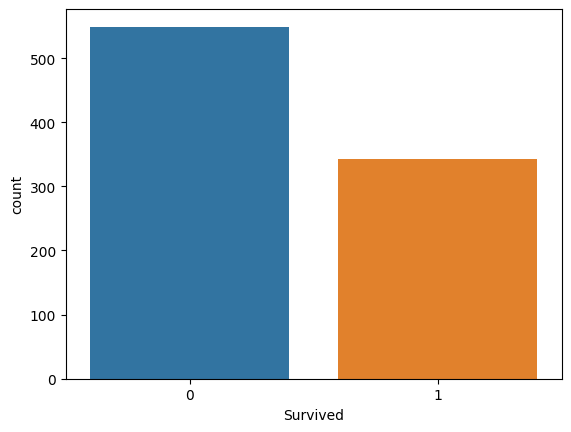

In [14]:
keys = train["Survived"].value_counts().keys()
sns.countplot(data=train,
             x="Survived",
             order = keys)

<Axes: xlabel='Pclass', ylabel='count'>

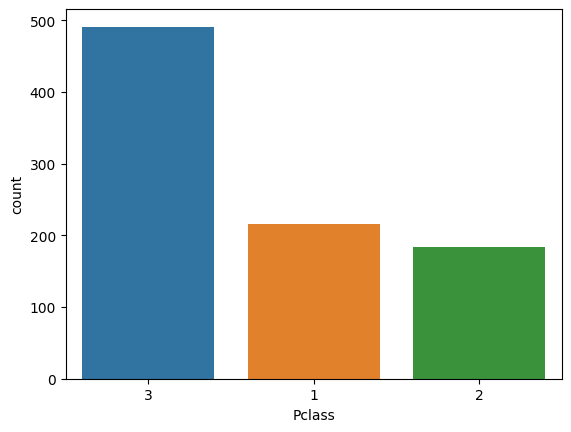

In [15]:
keys = train["Pclass"].value_counts().keys()
sns.countplot(data=train,
             x="Pclass",
             order = keys)

<Axes: xlabel='Sex', ylabel='count'>

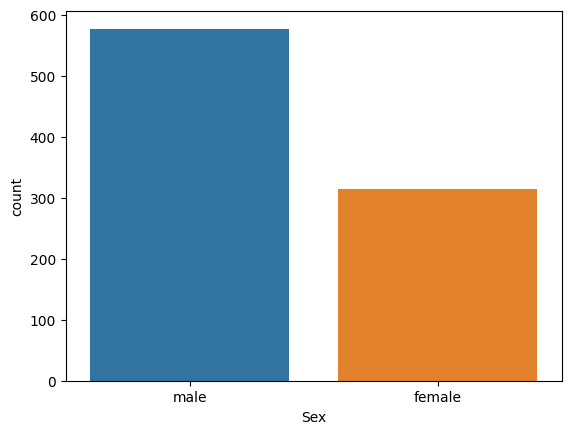

In [16]:
keys = train["Sex"].value_counts().keys()
sns.countplot(data=train,
             x="Sex",
             order = keys)

<Axes: xlabel='SibSp', ylabel='count'>

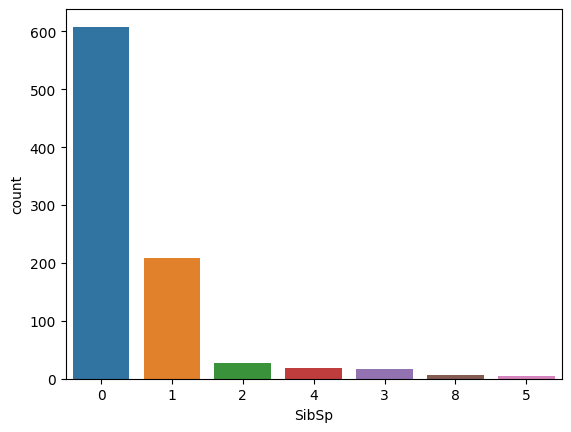

In [17]:
keys = train["SibSp"].value_counts().keys()
sns.countplot(data=train,
             x="SibSp",
             order = keys)

<Axes: xlabel='Parch', ylabel='count'>

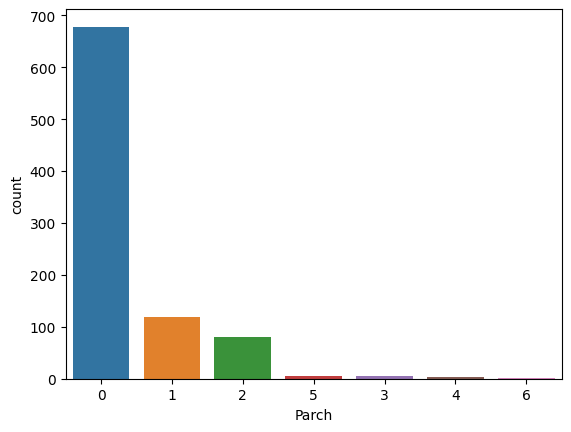

In [18]:
keys = train["Parch"].value_counts().keys()
sns.countplot(data=train,
             x="Parch",
             order = keys)

<Axes: xlabel='Embarked', ylabel='count'>

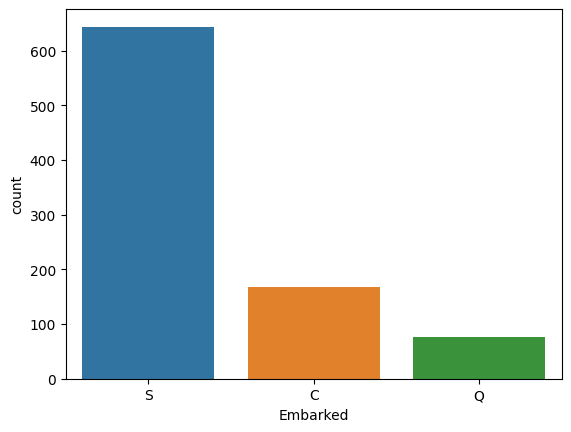

In [19]:

keys = train["Embarked"].value_counts().keys()
sns.countplot(data=train,
             x="Embarked",
             order = keys)

<Axes: xlabel='Age', ylabel='Density'>

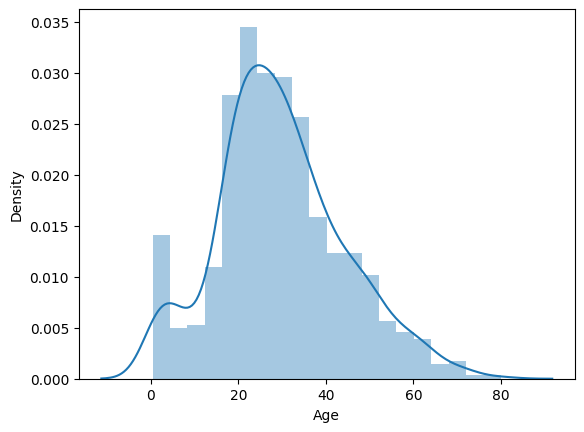

In [20]:
## Numerical attribuate
sns.distplot(train["Age"])

<Axes: xlabel='Fare', ylabel='Density'>

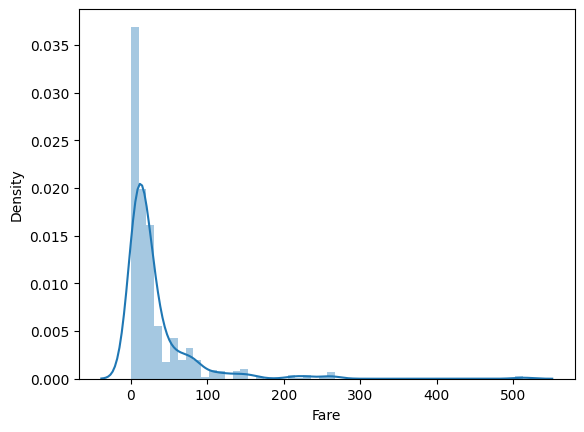

In [21]:
sns.distplot(train["Fare"])

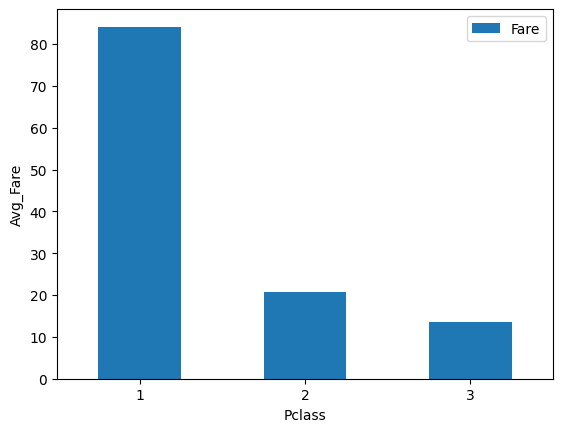

In [22]:
class_fare =  train.pivot_table(index="Pclass",values = "Fare")
class_fare.plot(kind ="bar")
plt.xlabel("Pclass")
plt.ylabel("Avg_Fare")
plt.xticks(rotation = 0)
plt.show()

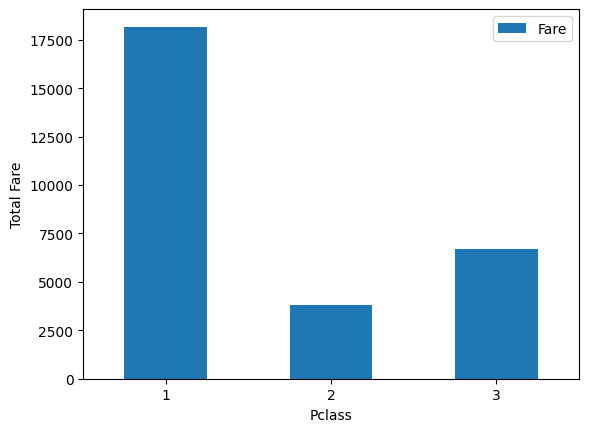

In [23]:
class_fare =  train.pivot_table(index="Pclass",values = "Fare",aggfunc = np.sum)
class_fare.plot(kind ="bar")
plt.xlabel("Pclass")
plt.ylabel("Total Fare")
plt.xticks(rotation = 0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

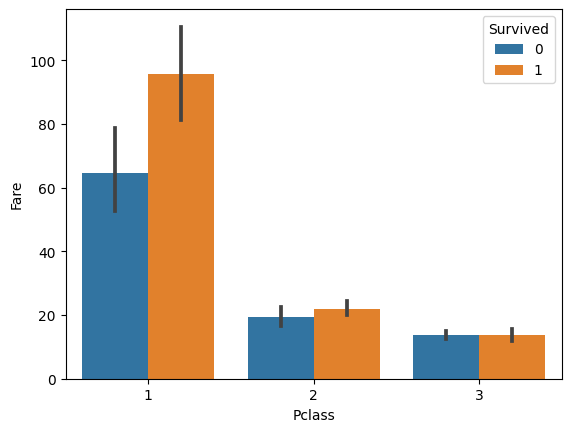

In [24]:
sns.barplot(data= train, x = "Pclass",y = "Fare",hue = "Survived")

Data Preprocessing
-

In [25]:
# combine the both data set train or test
df = pd.concat([train,test],axis = 0)
df = df.reset_index(drop= True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [27]:
# find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [28]:
# drop or delete the columns 
df = df.drop(columns = ['Cabin'],axis = 1)


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df["Age"].mean()

29.881137667304014

In [31]:
# filling the missing value use mean for numrical columns
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [32]:
df["Embarked"].mode()[0]

'S'

In [33]:
# filling the missingvalue use mode for catogorical columns
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [34]:
# find the null values
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [35]:
# Log transformation for Uniform Data distribution  

<Axes: xlabel='Fare', ylabel='Density'>

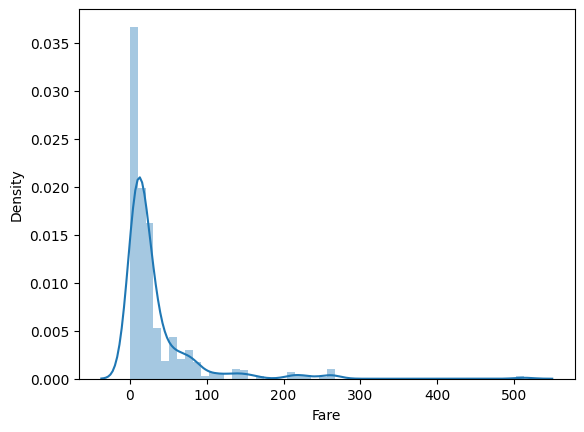

In [36]:
sns.distplot(df["Fare"])

In [37]:
df["Fare"] = np.log(df["Fare"]+1)

<Axes: xlabel='Fare', ylabel='Density'>

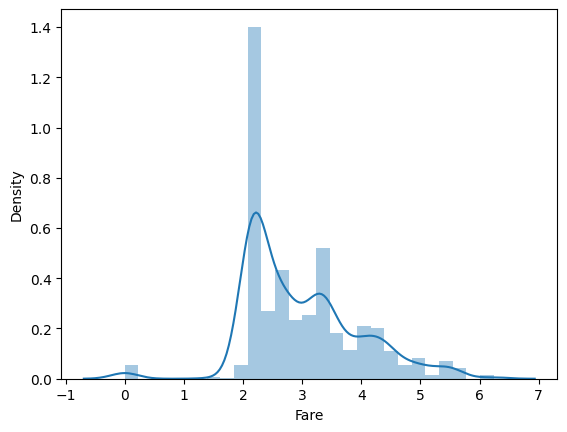

In [38]:
sns.distplot(df["Fare"])

Correlation Matrix
-

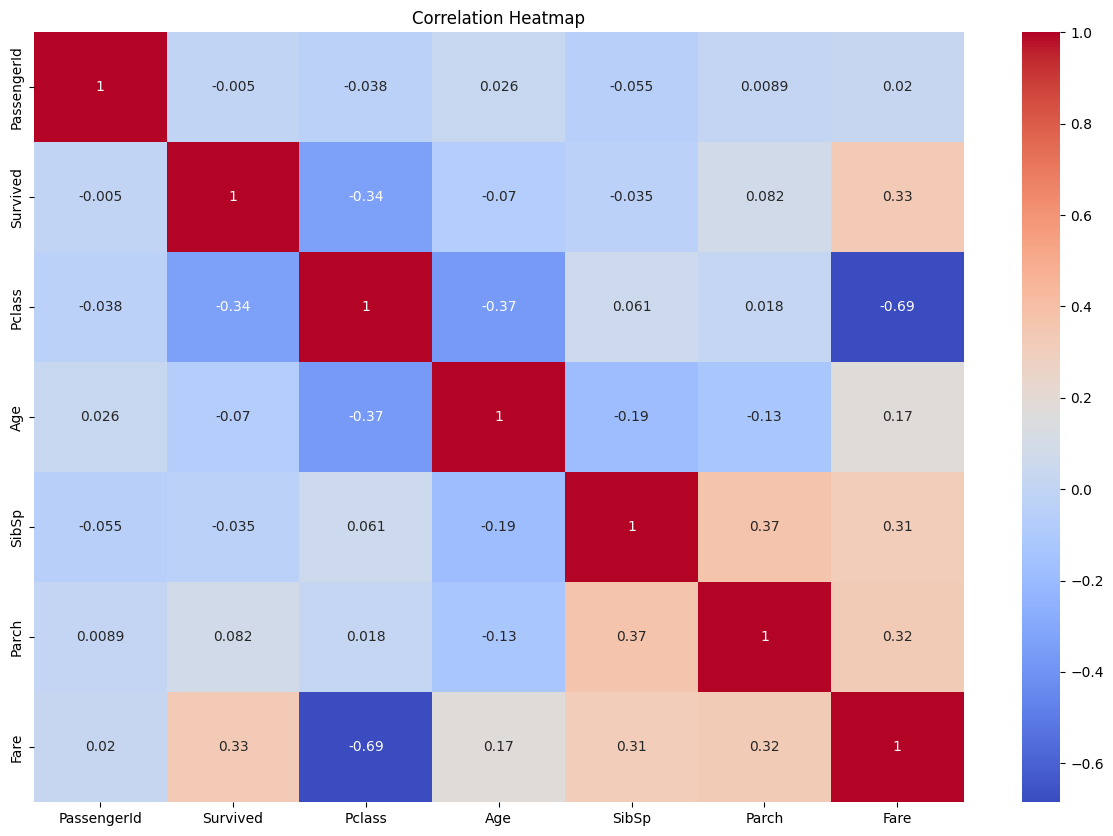

In [39]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
## Drop unnecessary columns
df = df.drop(columns = ["Name","Ticket"],axis = 1)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


Label Encoding
-

In [42]:
from sklearn.preprocessing import LabelEncoder
cols = ["Sex","Embarked"]
le = LabelEncoder()
for col in cols:
    df[col]=  le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## train test split

In [43]:
train = df.iloc[:len(train),:]

test = df.iloc[len(train):,:]

In [44]:
# input split
x= train.drop(columns = ["PassengerId","Survived"],axis =1)
y = train["Survived"]

In [45]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


Model Training
-

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
#Classify columns
def classify (model):
    x_train, x_test, y_train,y_test  = train_test_split(x,y,test_size = 0.25 , random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy:",model.score(x_test,y_test))

    score = cross_val_score(model,x,y,cv = 5)


    print("CV Score:",np.mean(score))

In [47]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [48]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model)

Accuracy: 0.7399103139013453
CV Score: 0.7710940932772582


In [49]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model)

Accuracy: 0.7757847533632287
CV Score: 0.8148389931579938


In [50]:
from lightgbm import LGBMClassifier
model= LGBMClassifier(verbose = -1)
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.8238277572029377


**Complete Model training with Full Data**
-

In [51]:
model = LGBMClassifier()
model.fit(x,y)

LGBMClassifier()

In [52]:
# input split for Test Data
x_test= test.drop(columns = ["PassengerId","Survived"],axis =1)


In [53]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.500000,0,0,2.178064,1
892,3,0,47.000000,1,0,2.079442,2
893,2,1,62.000000,0,0,2.369075,1
894,3,1,27.000000,0,0,2.268252,2
895,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,2.202765,2
1305,1,0,39.000000,0,0,4.699571,0
1306,3,1,38.500000,0,0,2.110213,2
1307,3,1,29.881138,0,0,2.202765,2


In [54]:
pred = model.predict(x_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

Test Submission
-

In [55]:
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [56]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [57]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype("int")

In [58]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [59]:
sub.to_csv("Submission.csv",index = False)